<a href="https://colab.research.google.com/github/joddiazra2793/IrisKNNClassifier/blob/main/KNN_Iris_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importación de librerías**
 


In [427]:
import numpy as np
import pandas as pd
from scipy import stats
import sklearn
import sklearn.datasets
import seaborn as sns
import matplotlib.pyplot as plt



##**1.   Lectura del DataSet de un archivo de texto tabular (CSV)**

##**Carga de Iris.csv mediante un DataFrame por url raw de GitHub**

In [428]:
#The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. 
#One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.
# 3 datasets o clases  (Setosa, Versicolour, and Virginica)

url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
dfI= pd.read_csv(url)
print(dfI.head(5))
print(dfI.size) #RxC
print(dfI.shape) #(Número de instancias, Columnas= Número de atributos o labels+Id o index)


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
750
(150, 5)


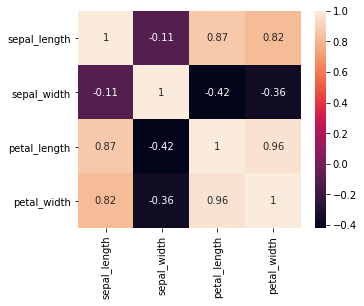

In [429]:
#Matriz de correlación
dfI.corr()
print("\n")
corr = dfI.corr()
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax)

In [430]:
print("Descriptions \n")
print(dfI.describe())
print("\n Class distributions \n")
print(dfI.groupby("species").size(),"\n")
print(dfI["species"].value_counts())

Descriptions 

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

 Class distributions 

species
setosa        50
versicolor    50
virginica     50
dtype: int64 

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64


**Instance Attribute** : An instance attribute is a Python variable belonging to only one object. It is only accessible in the scope of the object and it is defined inside the constructor function of a class. For example, __init__(self,..).

**Class Attribute**: A class attribute is a Python Variable that belongs to a class rather than a particular object. This is shared between all other objects of the same class and is defined outside the constructor function __init__(self,…), of the class.

---



**Differences Between Class and Instance Attributes** ,The difference is that class attributes are shared by all instances. When you change the value of a class attribute, it will affect all instances that share the same exact value. The attribute of an instance on the other hand is unique to that instance.


---

<!--
What is __dict__?

A __dict__ is a dictionary or mapping object used to store an object’s attributes.

But how does Python deal with the object and class attributes using the __dict__? Well, each instance is stored in a dictionary. -->

##**y = class labels (species)**


<center><img src = "https://github.com/joddiazra2793/IrisKNNClassifier/blob/main/IrisDataset.jpg?raw=true" alt = "PCA" width = "70%">  </img></center>



In [431]:
!git clone https://github.com/joddiazra2793/IrisKNNClassifier.git

fatal: destination path 'IrisKNNClassifier' already exists and is not an empty directory.





##**2.   Manejo de datos**
##**Creación de los sets**



In [432]:
#Column-based Data Processing via Disctionaries and ".map"
d = {"setosa": 0,
     "versicolor": 1,
     "virginica": 2}

dfI["species"] = dfI["species"].map(d)
dfI.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##**Arreglos de los labels y features o atributos**

In [433]:
y = dfI["species"].values #Class label array or Laberl  vector
X = dfI.iloc[:, 0:4].values #Features (Design Matrix), [all rows, col 1 to 4 ]
#X[:5]

##**Partición o splitting del DataSet en los SubSets de Train, Validation and Test**

In [434]:
#index array
indices = np.arange(X.shape[0]) #Length of X (#rows = # of training examples)
#reproducible suffled index array
rng = np.random.RandomState(123)
permuted_indices = rng.permutation(indices)
#we can use the shuffled index array to select the training set on validation set and tested
train_size, valid_size = int(0.65*X.shape[0]), int(0.15*X.shape[0])
test_size = X.shape[0] - (train_size + valid_size)
#print(train_size, valid_size, test_size)

In [435]:
train_ind = permuted_indices[:train_size]
valid_ind = permuted_indices[train_size:(train_size + valid_size)]
test_ind = permuted_indices[(train_size + valid_size):]

In [436]:
X_train, y_train = X[train_ind], y[train_ind] #65% data
X_valid, y_valid = X[valid_ind], y[valid_ind] #15% data
X_test, y_test = X[test_ind], y[test_ind] #20% data

##**3.   Aprendizaje de máquina supervisado**
##**Clasificador probabilístico KNN, aproximación No-paramétrica**





**Diagrama de clases de algoritmo KNN pronto...**

In [437]:
class KNNClassifier(object):
    
    def __init__(self, k, d_fn=None):
          "This is the 'init' or 'constructor' method"
          #This is the constructor, which will be executed when we create a new object
          #2 hyperparameters: k-nearest neighbors and d_fn: distance function (default: Euclidean distance) 
          self.k = k
          if d_fn is None:            
            self.d_fn = self._euclidean_d

    def _euclidean_d(self, xvalid, xtrain):
          #"Semi" private method, just internally used
          #xvalid is a instance from the Valid dataset
          #xtrain is a instance from the train dataset
          
          d = np.linalg.norm(np.array(xvalid) - np.array(xtrain)) 
          return d
      
    def _find_nearest(self, d):
          #argsort indices from the euclidean distances vector d
          nnb = np.argsort(d)[:self.k] #calculates the first 5 neighbors indices
          return nnb

    def fit(self, X, y):
          #The same training method
          self.dataset_ = X.copy()
          self.labels_ = y.copy()                    
    
    def predict(self, X):
          #X is the Valid dataset
          if len(X.shape) == 1:
            X = [X]
          y = []
          
          for xb in X:
            #print(xb)
            distances = [self.d_fn(xb, xa) for xa in self.dataset_]            
            nearest_neighbors = self._find_nearest(distances)
            #print("nnb", nearest_neighbors)
            labels = [self.labels_[nb] for nb in nearest_neighbors]
            y.append(stats.mode(labels)[0][0])
          return y
          

knn_model = KNNClassifier(k=5)
knn_model.fit(X_train, y_train)
print(knn_model.predict(X_valid))


[0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0]
